# Chap 2: Introducing Dask

## 2.1 Hello Dask

In [4]:
#!curl https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets?resource=download&select=Parking_Violations_Issued_-_Fiscal_Year_2017.csv

In [1]:
!ls

Dask_tutorial.ipynb
Dockerfile
Parking_Violations_Issued_-_Fiscal_Year_2017.csv
Parking_Violations_Issued_-_Fiscal_Year_2017.csv.zip
bashrc
delayed.ipynb
docker_build.sh
docker_run.sh
install_jupyter_extensions.sh
run_jupyter.sh


In [4]:
!wc -l Parking_Violations_Issued_-_Fiscal_Year_2017.csv

!head -10000 Parking_Violations_Issued_-_Fiscal_Year_2017.csv >Parking_Violations_Issued_-_Fiscal_Year_2017.small.csv

!wc -l Parking_Violations_Issued_-_Fiscal_Year_2017.small.csv

10803029 Parking_Violations_Issued_-_Fiscal_Year_2017.csv


In [37]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

#file_name = "Parking_Violations_Issued_-_Fiscal_Year_2017.csv"
file_name = "Parking_Violations_Issued_-_Fiscal_Year_2017.small.csv"

df = dd.read_csv(file_name,
                 dtype={
                     'House Number': 'object',
                     'Time First Observed': 'object'
                 },
                )
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,int64,object,object,object,int64,int64,int64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,int64,object,int64,object,object,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [38]:
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [39]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
dtype: float64
Dask Name: mul, 9 graph layers

In [40]:
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct

[########################################] | 100% Completed | 224.21 ms


Summons Number                         0.000000
Plate ID                               0.000000
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.400040
Vehicle Make                           0.590059
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    18.501850
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        18.411841
Issuer Squad                          18.421842
Violation Time                         0.000000
Time First Observed                   92

In [41]:
# This is a pd.Series.
columns_to_drop = missing_count_pct[missing_count_pct > 60].index
print(columns_to_drop)
with ProgressBar():
    df_dropped = df.drop(columns_to_drop, axis=1).persist()
    
# df_dropped is a Dask object.
df_dropped

Index(['Time First Observed', 'Intersecting Street', 'Violation Legal Code',
       'Unregistered Vehicle?', 'Meter Number',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')
[########################################] | 100% Completed | 103.53 ms


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Date First Observed,Law Section,Sub Division,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code,Violation Description
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,int64,object,object,object,int64,int64,int64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,int64,int64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## 2.2 Visualizing DAGs

dask= 5
correct= 5


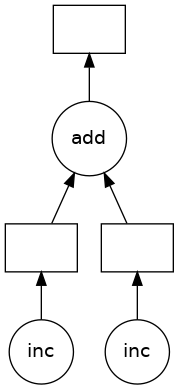

In [32]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar


def inc(i):
    return i + 1


x = delayed(inc)(1)
y = delayed(inc)(2)


def add(x, y):
    return x + y


z = delayed(add)(x, y)
print("dask=", z.compute())
print("correct=", 1 + 1 + 2 + 1)
z.visualize()

correct= 32
dask= 32


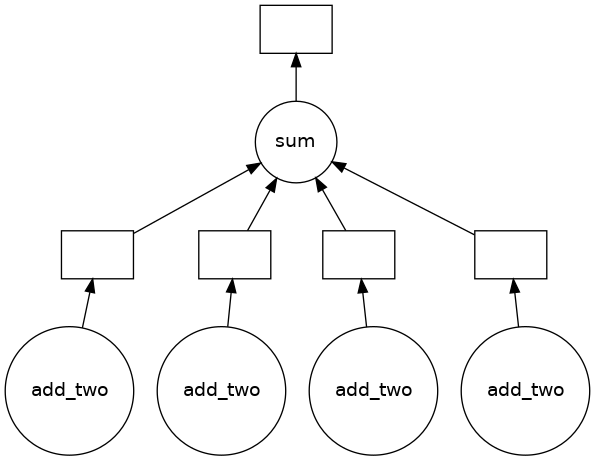

In [33]:
data = [1, 5, 8, 10]

def add_two(x):
    return x + 2


step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
print("dask=", total.compute())
print("correct=", 1 + 2 + 5 + 2 + 8 + 2 + 10 + 2)
total.visualize()

dask= 128
correct= 128


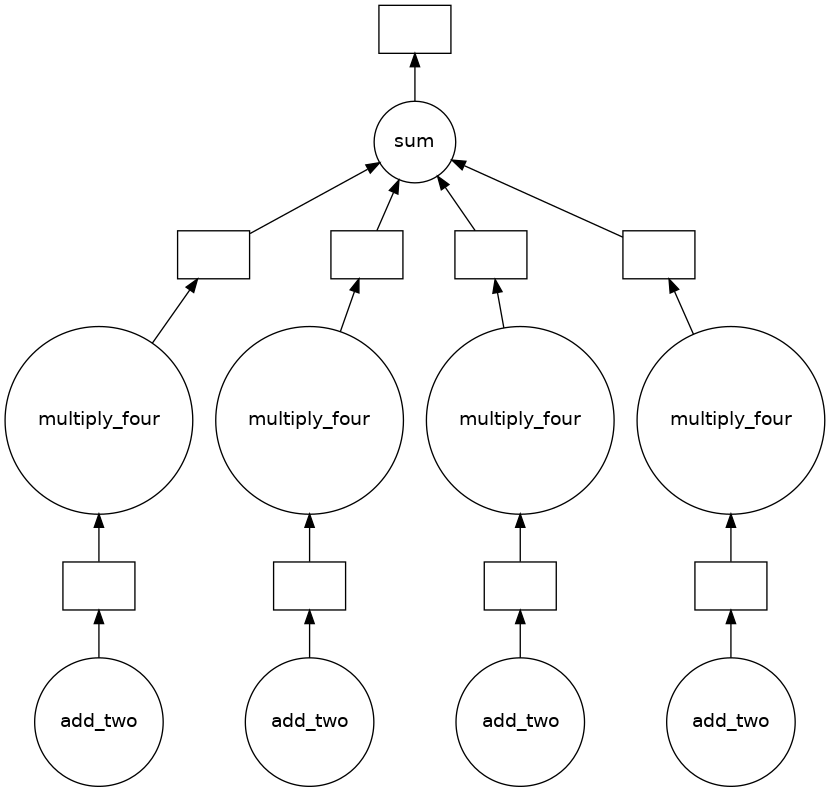

In [34]:
data = [1, 5, 8, 10]


def add_two(x):
    return x + 2


step1 = [delayed(add_two)(i) for i in data]


def multiply_four(x):
    return x * 4


step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
print("dask=", total.compute())
print("correct=", (1 + 2) * 4 + (5 + 2) * 4 + (8 + 2) * 4 + (10 + 2) * 4)
total.visualize()

total= 128
data= [1, 5, 8, 10]
dask= 536
correct= 536


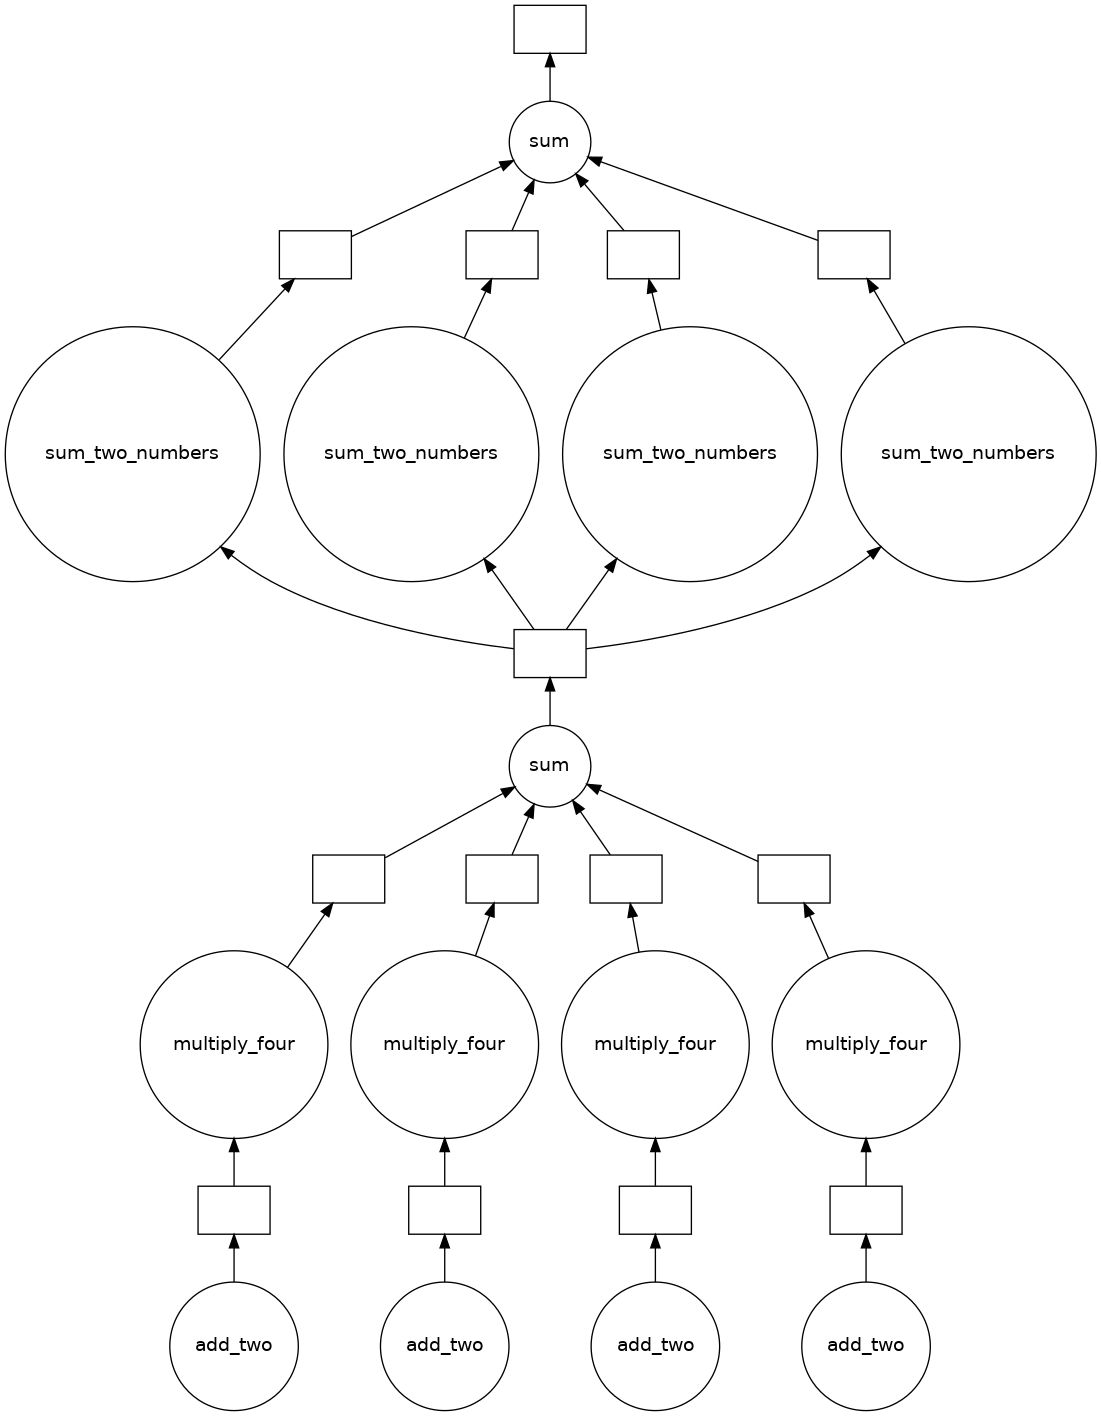

In [31]:
print("total=", total.compute())
print("data=", data)
# Sum data again value by value.
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
# Accumulate.
total2 = delayed(sum)(data2)
print("dask=", total2.compute())
print("correct=", 128 * 4 + 1 + 5 + 8 + 10)
total2.visualize()

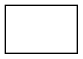

In [35]:
total_persisted = total.persist()
total_persisted.visualize()

##

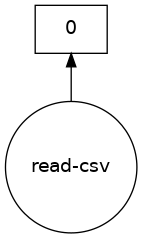

In [45]:
df.visualize()

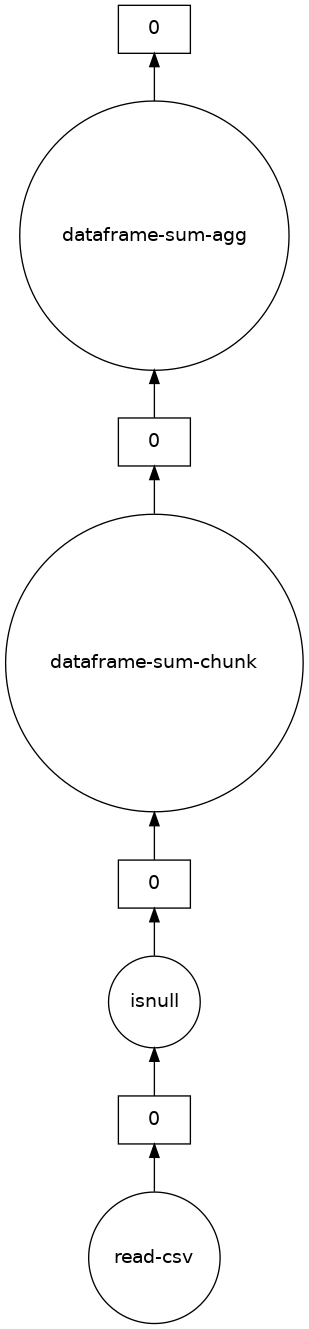

In [44]:
missing_values.visualize()

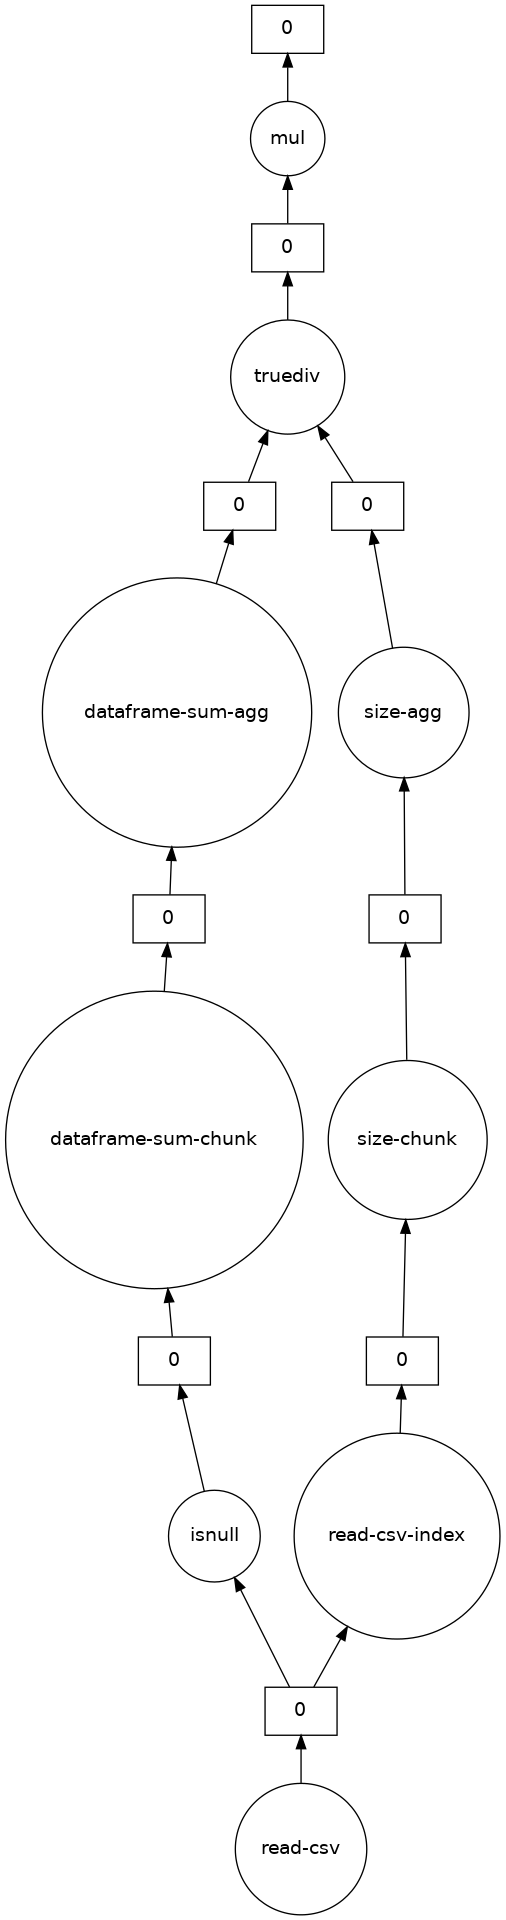

In [42]:
missing_count.visualize()

## 2.3 Task scheduling

# 3, Introducing Dask DataFrames

## 3.1, Why use DataFrames?

From https://github.com/jcdaniel91/data-science-python-dask/blob/master/Chapter%203.ipynb

In [48]:
import pandas as pd
import dask.dataframe as dd

# Creating all the data as lists
person_IDs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
person_last_names = [
    'Smith', 'Williams', 'Williams', 'Jackson', 'Johnson', 'Smith', 'Anderson',
    'Christiansen', 'Carter', 'Davidson'
]
person_first_names = [
    'John', 'Bill', 'Jane', 'Cathy', 'Stuart', 'James', 'Felicity', 'Liam',
    'Nancy', 'Christina'
]
person_DOBs = [
    '1982-10-06', '1990-07-04', '1989-05-06', '1974-01-24', '1995-06-05',
    '1984-04-16', '1976-09-15', '1992-10-02', '1986-02-05', '1993-08-11'
]

# Storing the data in a Pandas DataFrame
people_pandas_df = pd.DataFrame(
    {
        'Person ID': person_IDs,
        'Last Name': person_last_names,
        'First Name': person_first_names,
        'Date of Birth': person_DOBs
    },
    columns=['Person ID', 'Last Name', 'First Name', 'Date of Birth'])
display(people_pandas_df)


,Person ID,Last Name,First Name,Date of Birth
0,1,Smith,John,1982-10-06
1,2,Williams,Bill,1990-07-04
2,3,Williams,Jane,1989-05-06
3,4,Jackson,Cathy,1974-01-24
4,5,Johnson,Stuart,1995-06-05
5,6,Smith,James,1984-04-16
6,7,Anderson,Felicity,1976-09-15
7,8,Christiansen,Liam,1992-10-02
8,9,Carter,Nancy,1986-02-05
9,10,Davidson,Christina,1993-08-11


In [57]:
# Converting the Pandas DataFrame to a Dask DataFrame
people_dask_df = dd.from_pandas(people_pandas_df, npartitions=2)
print("# people_dask_df=\n%s" % people_dask_df)
print("# divisions=", people_dask_df.divisions)
print("# npartitions=", people_dask_df.npartitions)

# map_partitions() applies a function to each partition.
print("# elements per partition=\n%s" %
    people_dask_df.map_partitions(len).compute())

# people_dask_df=
Dask DataFrame Structure:
              Person ID Last Name First Name Date of Birth
npartitions=2                                             
0                 int64    object     object        object
5                   ...       ...        ...           ...
9                   ...       ...        ...           ...
Dask Name: from_pandas, 1 graph layer
# divisions= (0, 5, 9)
# npartitions= 2
# elements per partition=
0    5
1    5
dtype: int64


In [67]:
# Filter.
people_filtered = people_dask_df[people_dask_df['Last Name'] != 'Williams']
print("# partitions before=\n%s" % people_filtered.map_partitions(lambda x: len(x)).compute())
display(people_filtered.compute())

# Repartitioning.
people_filtered_reduced = people_filtered.repartition(npartitions=1)
print("# partitions after=\n%s" % people_filtered_reduced.map_partitions(lambda x: len(x)).compute())

# partitions before=
0    3
1    5
dtype: int64


,Person ID,Last Name,First Name,Date of Birth
0,1,Smith,John,1982-10-06
3,4,Jackson,Cathy,1974-01-24
4,5,Johnson,Stuart,1995-06-05
5,6,Smith,James,1984-04-16
6,7,Anderson,Felicity,1976-09-15
7,8,Christiansen,Liam,1992-10-02
8,9,Carter,Nancy,1986-02-05
9,10,Davidson,Christina,1993-08-11


# partitions after=
0    8
dtype: int64


# 4. Reading data from text files

In [72]:
!ls Parking*

Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv
Parking_Violations_Issued_-_Fiscal_Year_2015.csv
Parking_Violations_Issued_-_Fiscal_Year_2016.csv
Parking_Violations_Issued_-_Fiscal_Year_2017.csv
Parking_Violations_Issued_-_Fiscal_Year_2017.csv.zip
Parking_Violations_Issued_-_Fiscal_Year_2017.small.csv


In [88]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

data_types = {
    "House Number": 'object',
    "Time First Observed": 'object',
}

fy14 = dd.read_csv(
    'Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
    dtype=data_types,
)
fy15 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2015.csv',
                  dtype=data_types)
fy16 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2016.csv',
                  dtype=data_types)
fy17 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
                  dtype=data_types)
fy17

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=62,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,int64,object,object,object,int64,int64,int64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,int64,object,int64,object,object,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [82]:
df = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv', nrows=10)
df.columns
#re

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [90]:
# Problems with the column types.
# | House Number        | object | float64  |
# | Time First Observed | object | float64
fy17.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,...,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,...,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


In [91]:
# Reading columns is quick.
fy17.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [92]:
# Find common columns.
from functools import reduce

columns = [
    set(fy14.columns),
    set(fy15.columns),
    set(fy16.columns),
    set(fy17.columns)
]
common_columns = list(reduce(lambda a, i: a.intersection(i), columns))
common_columns

['Registration State',
 'Street Code1',
 'Violation Location',
 'Vehicle Expiration Date',
 'Violation Legal Code',
 'Street Code3',
 'Unregistered Vehicle?',
 'Vehicle Year',
 'Days Parking In Effect    ',
 'Date First Observed',
 'Violation Code',
 'Vehicle Make',
 'To Hours In Effect',
 'Plate Type',
 'Hydrant Violation',
 'Vehicle Body Type',
 'From Hours In Effect',
 'Violation Description',
 'Issue Date',
 'Issuer Code',
 'Issuer Precinct',
 'Issuer Command',
 'Street Name',
 'Violation In Front Of Or Opposite',
 'Street Code2',
 'Intersecting Street',
 'Meter Number',
 'No Standing or Stopping Violation',
 'Plate ID',
 'House Number',
 'Sub Division',
 'Violation County',
 'Feet From Curb',
 'Double Parking Violation',
 'Vehicle Color',
 'Issuing Agency',
 'Violation Precinct',
 'Time First Observed',
 'Violation Time',
 'Law Section',
 'Summons Number',
 'Violation Post Code',
 'Issuer Squad']

In [94]:
fy17[common_columns].head()

,Registration State,Street Code1,Violation Location,Vehicle Expiration Date,Violation Legal Code,Street Code3,Unregistered Vehicle?,Vehicle Year,Days Parking In Effect,Date First Observed,...,Double Parking Violation,Vehicle Color,Issuing Agency,Violation Precinct,Time First Observed,Violation Time,Law Section,Summons Number,Violation Post Code,Issuer Squad
0,NY,0,NaN,0,T,0,NaN,2001,NaN,0,...,NaN,GY,V,0,NaN,0143A,1111,5092469481,NaN,NaN
1,NY,0,NaN,0,T,0,NaN,2001,NaN,0,...,NaN,GY,V,0,NaN,0400P,1111,5092451658,NaN,NaN
2,NY,0,NaN,0,T,0,NaN,2004,NaN,0,...,NaN,BK,V,0,NaN,0233P,1111,4006265037,NaN,NaN
3,NY,10610,14.0,20180630,NaN,34350,NaN,2007,Y,0,...,NaN,WH,T,14,NaN,1120A,408,8478629828,04,J
4,NY,10510,13.0,20170228,NaN,34330,NaN,2007,Y,0,...,NaN,WHITE,T,13,NaN,0555P,408,7868300310,31 6,M


In [110]:
# There are issues with the schema.
# Issuer Squad
# Unregistered Vehicle?
# Violation Description
# Violation Legal Code
# Violation Post Code
#fy14[common_columns].head()

In [126]:
import numpy as np
import pandas as pd
import pprint

dtype_dict = dict([x, str] for x in common_columns)
#print("dtype_dict=", pprint.pformat(dtype_dict))

# Read data with no schema.
fy14 = dd.read_csv(
    'Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
    dtype=dtype_dict,
)
fy14_df = fy14[common_columns].head(10000)

In [123]:
fy14_df.columns

Index(['Registration State', 'Street Code1', 'Violation Location',
       'Vehicle Expiration Date', 'Violation Legal Code', 'Street Code3',
       'Unregistered Vehicle?', 'Vehicle Year', 'Days Parking In Effect    ',
       'Date First Observed', 'Violation Code', 'Vehicle Make',
       'To Hours In Effect', 'Plate Type', 'Hydrant Violation',
       'Vehicle Body Type', 'From Hours In Effect', 'Violation Description',
       'Issue Date', 'Issuer Code', 'Issuer Precinct', 'Issuer Command',
       'Street Name', 'Violation In Front Of Or Opposite', 'Street Code2',
       'Intersecting Street', 'Meter Number',
       'No Standing or Stopping Violation', 'Plate ID', 'House Number',
       'Sub Division', 'Violation County', 'Feet From Curb',
       'Double Parking Violation', 'Vehicle Color', 'Issuing Agency',
       'Violation Precinct', 'Time First Observed', 'Violation Time',
       'Law Section', 'Summons Number', 'Violation Post Code', 'Issuer Squad'],
      dtype='object')

In [127]:
print(fy14_df["Unregistered Vehicle?"].unique())

['0']


In [130]:
with ProgressBar():
    fy14["Vehicle Year"].unique().head(10)

[########################################] | 100% Completed | 106.54 s


In [134]:
# Correct schema.
dtypes = {
    'Date First Observed': str,
    'Days Parking In Effect    ': str,
    'Double Parking Violation': str,
    'Feet From Curb': np.float32,
    'From Hours In Effect': str,
    'House Number': str,
    'Hydrant Violation': str,
    'Intersecting Street': str,
    'Issue Date': str,
    'Issuer Code': np.float32,
    'Issuer Command': str,
    'Issuer Precinct': np.float32,
    'Issuer Squad': str,
    'Issuing Agency': str,
    'Law Section': np.float32,
    'Meter Number': str,
    'No Standing or Stopping Violation': str,
    'Plate ID': str,
    'Plate Type': str,
    'Registration State': str,
    'Street Code1': np.uint32,
    'Street Code2': np.uint32,
    'Street Code3': np.uint32,
    'Street Name': str,
    'Sub Division': str,
    'Summons Number': np.uint32,
    'Time First Observed': str,
    'To Hours In Effect': str,
    'Unregistered Vehicle?': str,
    'Vehicle Body Type': str,
    'Vehicle Color': str,
    'Vehicle Expiration Date': str,
    'Vehicle Make': str,
    'Vehicle Year': np.float32,
    'Violation Code': np.uint16,
    'Violation County': str,
    'Violation Description': str,
    'Violation In Front Of Or Opposite': str,
    'Violation Legal Code': str,
    'Violation Location': str,
    'Violation Post Code': str,
    'Violation Precinct': np.float32,
    'Violation Time': str
}

# Read data with no schema.
fy14 = dd.read_csv(
    'Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
    dtype=dtypes,
    usecols=common_columns,
)

## 5. Cleaning and trasforming DataFrames

In [161]:
!ls

 Dask_tutorial.ipynb
 Dockerfile
 Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv
 Parking_Violations_Issued_-_Fiscal_Year_2015.csv
 Parking_Violations_Issued_-_Fiscal_Year_2016.csv
 Parking_Violations_Issued_-_Fiscal_Year_2017.csv
 Parking_Violations_Issued_-_Fiscal_Year_2017.csv.zip
 Parking_Violations_Issued_-_Fiscal_Year_2017.small.csv
 bashrc
 delayed.ipynb
 docker_build.sh
 docker_jupyter.sh
 docker_run.sh
 download_nyc_data.sh
 install_jupyter_extensions.sh
 kaggle.json
 mydask.png
 nyc-parking-tickets.zip
'nyc-parking-tickets?resource=download&select=Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv'
 nyc_data
 run_jupyter.sh


In [169]:
#nyc_data_raw = fy14
# Read data with no schema.
nyc_data_raw = dd.read_csv(
    #'Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
    'Parking_Violations_Issued_-_Fiscal_Year_2017.small.csv',
    dtype=dtypes,
    usecols=common_columns,
)
# 391,311,954
# 429,957
with ProgressBar():
    print("num_rows=", nyc_data_raw.size.compute())

# Requesting a single column and getting back a pd.Series.
with ProgressBar():
    display(fy14["Plate ID"].head())

[########################################] | 100% Completed | 433.16 ms
num_rows= 429957
[########################################] | 100% Completed | 2.04 ss


0    GBB9093
1    62416MB
2    78755JZ
3    63009MA
4    91648MC
Name: Plate ID, dtype: object

In [170]:
# Requesting a list of columns and getting back a pd.DataFrame.
with ProgressBar():
    display(fy14[["Plate ID", "Registration State"]].head())

[########################################] | 100% Completed | 1.19 ss


,Plate ID,Registration State
0,GBB9093,NY
1,62416MB,NY
2,78755JZ,NY
3,63009MA,NY
4,91648MC,NY


In [139]:
# Keep all but a column.
display(nyc_data_raw.drop("Violation Code", axis=1).head())

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,SUBN,AUDI,P,37250,13610,...,GY,0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,VAN,FORD,P,37290,40404,...,WH,0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,P-U,CHEVR,P,37030,31190,...,NaN,0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,VAN,FORD,P,37270,11710,...,WH,0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,TRLR,GMC,P,37240,12010,...,BR,0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN


In [141]:
# Renaming columns.
display(nyc_data_raw)
nyc_data_renamed = nyc_data_raw.rename(columns={'Plate ID': 'License Plate'})
display(nyc_data_renamed)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=55,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,uint32,object,object,object,object,uint16,object,object,object,uint32,uint32,uint32,object,object,float32,float32,float32,object,object,object,object,object,object,object,object,object,object,float32,object,object,object,object,object,object,object,float32,object,float32,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


,Summons Number,License Plate,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=55,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,uint32,object,object,object,object,uint16,object,object,object,uint32,uint32,uint32,object,object,float32,float32,float32,object,object,object,object,object,object,object,object,object,object,float32,object,object,object,object,object,object,object,float32,object,float32,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [171]:
# Get a slice of rows by index.
with ProgressBar():
    display(nyc_data_raw.loc[100:200].head(100))

[########################################] | 100% Completed | 319.87 ms


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
100,327290417,GUG8491,NY,PAS,07/14/2016,36,SUBN,CHEVR,V,0,...,TN,NaN,2015.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
101,4267283480,FFL7741,NY,PAS,05/08/2017,38,SUBN,TOYOT,T,0,...,BK,NaN,2016.0,NaN,0.0,20,38-Failure to Display Muni Rec,NaN,NaN,NaN
102,338592936,B77FRW,NJ,PAS,05/08/2017,36,WAGO,HONDA,V,0,...,GY,NaN,2001.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
103,4248041784,GJA1784,NY,PAS,06/02/2017,20,SUBN,HONDA,T,59430,...,BK,NaN,2015.0,NaN,0.0,04,20A-No Parking (Non-COM),NaN,NaN,NaN
104,4258692576,36012JH,NY,COM,06/05/2017,40,VAN,GMC,T,51890,...,WHITE,NaN,2002.0,NaN,0.0,42-A,40-Fire Hydrant,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3861077882,HLF3741,NY,PAS,12/21/2016,38,4DSD,INFIN,T,93250,...,GY,NaN,2016.0,NaN,0.0,U 31,38-Failure to Display Muni Rec,NaN,NaN,NaN
196,4227939119,HME3832,NY,PAS,03/21/2017,21,4DSD,HYUND,T,26610,...,WH,NaN,2016.0,NaN,0.0,H,21-No Parking (street clean),NaN,NaN,NaN
197,3740480314,JRV7796,PA,PAS,08/25/2016,21,4DSD,HONDA,T,78130,...,BLACK,NaN,0.0,NaN,0.0,14 3,21-No Parking (street clean),NaN,NaN,NaN
198,3015344385,973,NY,VAS,02/02/2017,38,SUBN,TOYOT,T,8480,...,BK,NaN,2016.0,NaN,0.0,01,38-Failure to Display Muni Rec,NaN,NaN,NaN


## 5.2 Dealing with missing values

In [189]:
# When we apply head(1000) we materialize a DataFrame.
#missing_values = nyc_data_raw.head(1000).isnull().sum()

# When we do .loc we keep the data in Dask.
missing_values = nyc_data_raw.loc[:1000].isnull().sum()
num_rows = nyc_data_raw.loc[:1000].index.size

with ProgressBar():
    pct_missing = (missing_values / num_rows) * 100
    pct_missing = pct_missing.compute()
    
pct_missing

[########################################] | 100% Completed | 107.04 ms


Summons Number                         0.000000
Plate ID                               0.000000
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.399600
Vehicle Make                           0.499500
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    19.280719
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        19.080919
Issuer Squad                          19.080919
Violation Time                         0.000000
Time First Observed                   93

In [188]:
#missing_values.index.size.compute()
#nyc_data_raw.loc[:1000].isnull().compute()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,True
997,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,True
998,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,True
999,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,True


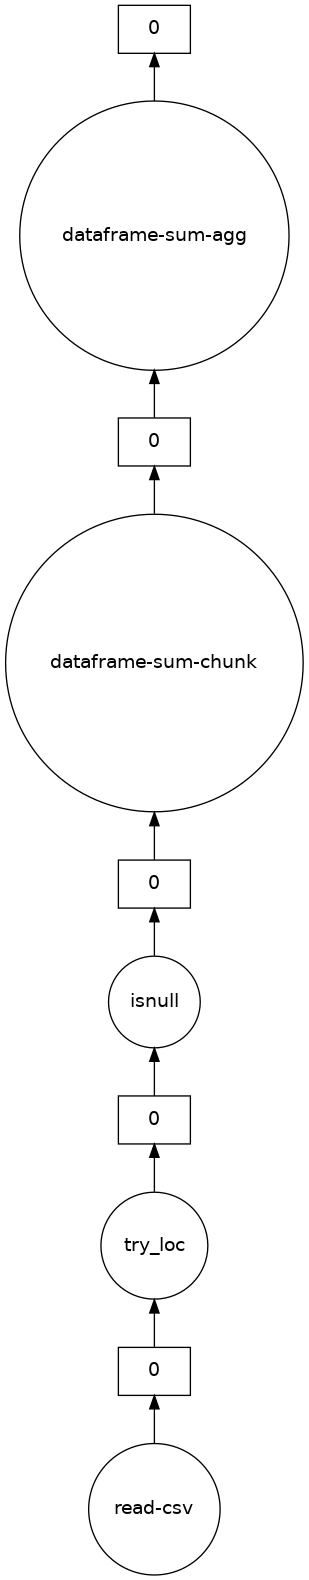

In [173]:
# All partitions are read and filtered.
missing_values = nyc_data_raw.loc[:1000].isnull().sum()
missing_values.visualize()

In [192]:
# Drop columns that have more than 50% missing values.

columns_to_drop = list(pct_missing[pct_missing >= 50].index)
print(columns_to_drop)

nyc_data_clean_stage1 = nyc_data_raw.drop(columns_to_drop, axis=1)

['Time First Observed', 'Intersecting Street', 'Violation Legal Code', 'Unregistered Vehicle?', 'Meter Number', 'No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation']


In [199]:
# Impute missing values to the most common.
with ProgressBar():
    count_of_vehicle_colors = nyc_data_clean_stage1[
        "Vehicle Color"].value_counts().compute()
    print("count_of_vehicle_colors\n%s" % count_of_vehicle_colors)
    most_common_color = count_of_vehicle_colors.sort_values(
        ascending=False).index[0]
    print("most_common_color=", most_common_color)

[########################################] | 100% Completed | 414.07 ms
count_of_vehicle_colors
GY       1626
WH       1476
BK       1414
WHITE    1254
BLACK     577
         ... 
MAR         1
MUL         1
NAVY        1
ORB         1
LBL         1
Name: Vehicle Color, Length: 99, dtype: int64
most_common_color= GY


In [201]:
nyc_data_clean_stage2 = nyc_data_clean_stage1.fillna(
    {'Vehicle Color': most_common_color})
print(nyc_data_clean_stage2)

Dask DataFrame Structure:
              Summons Number Plate ID Registration State Plate Type Issue Date Violation Code Vehicle Body Type Vehicle Make Issuing Agency Street Code1 Street Code2 Street Code3 Vehicle Expiration Date Violation Location Violation Precinct Issuer Precinct Issuer Code Issuer Command Issuer Squad Violation Time Violation County Violation In Front Of Or Opposite House Number Street Name Date First Observed Law Section Sub Division Days Parking In Effect     From Hours In Effect To Hours In Effect Vehicle Color Vehicle Year Feet From Curb Violation Post Code Violation Description
npartitions=1                                                                                                                                                                                                                                                                                                                                                                                         